# Support Vector Machines

En este ejercicio iremos viendo como podemos emplear las técnicas aprendidas anteriormente en ejercicios de clasificación. Nos interesa ver cómo de difícil se lo podemos poner a los SVMs.

In [1]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape) 

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


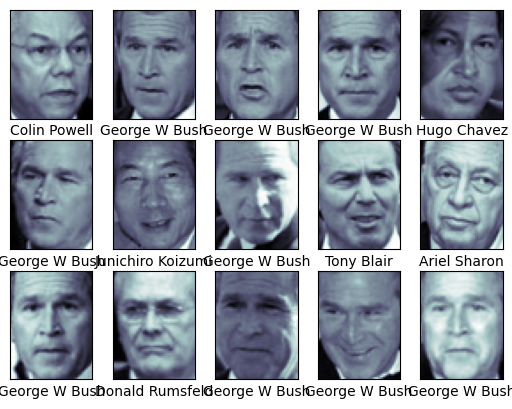

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Como vemos se trata de caras de personas públicas de la esfera política. Buscaremos un buen estimador para ver si acertamos a automatizar la identificación de caras.

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca = StandardScaler()
svc = SVC(kernel='linear', class_weight='balanced') # EL 'gamma' ES RELAVANTE CUANDO EN VEZ DE SER 'lineal' ES 'sigmoid, rpf o poli' 
model = make_pipeline(pca, svc) # LAS DOS VARIABLES DE ARRIBA, LA PRIMERA ESCALA LOS DATOS, Y LA SEGUNDA LOS ENTRENA 

In [5]:
pca # ESTE OBJETO CONTIENE ALGO DEL TIPO 'StandardScaler' 

StandardScaler()

In [29]:
svc # EXISTE IGUAL CANTIDAD DE MUESTRAS DE TODAS LAS CLASES ('class_weight='balanced'), kernel='lineal' QUIERE DECIR QUE MANTIENE LA BASE DE DATOS ORIGINAL  

SVC(class_weight='balanced', kernel='linear')

In [30]:
model # DEVUELVE UN 'pipeline' QUE ESTÁ COMPUESTO EN UNA PRIMERA ETAPA DE UN 'StandardScaler' Y LUEGO DE UN 'SVC', ES DECIR, PRIMERO ESCALA LOS DATOS Y LUEGO 
# LOS ENTRENA 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', kernel='linear'))])

Hemos construido un pipeline, una cadena de tareas que se dan en secuencia. De este modo siempre escalaremos los datos antes de enviarlos a nuestro modelo. Ahora debemos buscar un separación para entrenamiento y validación.

In [38]:
from sklearn.model_selection import train_test_split

# NECESITO QUE 'faces.images' SEA DE DOS DIMENSIONES Y NO DE TRES COMO ESTÁ DEFINIDO ORIGINALMENTE 
# 'faces.target' NO SE TOCA PORQUE SON LAS ETIQUETAS  
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.images.reshape(len(faces.images), -1), faces.target, random_state=42) 

In [11]:
Xtrain[0].shape

(62, 47)

In [39]:
len(Xtrain) # CANTIDAD DE DATOS PARA ENTRENAR 

1011

In [40]:
len(Xtest) # CANTIDAD DE DATOS PARA TESTEAR 

337

Y definir una serie de valores sobre los que variar los parámetros del modelo.

In [15]:
Xtrain

array([[[0.41960785, 0.41830066, 0.42352942, ..., 0.4300654 ,
         0.43006536, 0.3869281 ],
        [0.41960785, 0.4261438 , 0.43398693, ..., 0.40522876,
         0.4143791 , 0.3934641 ],
        [0.42352942, 0.44052288, 0.44575164, ..., 0.38300657,
         0.38300654, 0.39607844],
        ...,
        [0.00784314, 0.00522876, 0.00653595, ..., 0.4888889 ,
         0.42091504, 0.39738563],
        [0.01045752, 0.00653595, 0.00784314, ..., 0.4496732 ,
         0.38169935, 0.38300654],
        [0.01045752, 0.00784314, 0.00915033, ..., 0.41960788,
         0.37124184, 0.3895425 ]],

       [[0.34640524, 0.22091503, 0.21045752, ..., 0.31895426,
         0.31764707, 0.22352941],
        [0.4379085 , 0.33464053, 0.26928106, ..., 0.29673204,
         0.2901961 , 0.23006536],
        [0.4366013 , 0.43006536, 0.3647059 , ..., 0.29281047,
         0.33594772, 0.26797387],
        ...,
        [0.19477125, 0.39869285, 0.54509807, ..., 0.827451  ,
         0.83267975, 0.83398694],
        [0.3

In [ ]:
Xtrain.reshape(len(Xtrain, -1))

In [32]:
from sklearn.model_selection import GridSearchCV

# SE APLICA LA 'regularización' QUE TIENE LA FUNCIÓN DE PENALIZAR AL MODELO PARA QUE ESTE NO SEA SOBREENTRENADO Y DE ESTA FORMA PUEDA HACER BUENAS PREDICCIÓN
#CON LO CUAL ESTAS NO SERÁN EL MISMO VALOR DEL DATO SINO MUY SIMILAR. POR LO COMÚN SE INCORPORA EL VALOR '1'  

# Variad entre varios parámetros
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100 ],       # MEMORIZAR ESTOS VALORES 
              'svc__gamma': [0.02, 0.06, 0.8, 26, 27]}   # SE PUEDEN CAMBIAR ESTOS VALORES PARA INTENTAR HACER EL MODELO MÁS PRECISO, PERO ES PREFERIBLE NO HACERLO 

grid = GridSearchCV(model, param_grid)

In [42]:
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100 ],       # MEMORIZAR ESTOS VALORES 
              'svc__gamma': [0.02, 0.06, 0.8, 26, 27]}       

grid = GridSearchCV(model, param_grid)

In [44]:
%time grid.fit(Xtrain.reshape(len(Xtrain), -1), ytrain)

CPU times: total: 9.42 s
Wall time: 54.8 s


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear'))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.02, 0.06, 0.8, 26, 27]})

In [45]:
%time grid.fit(Xtrain, ytrain) 

CPU times: total: 15.6 s
Wall time: 1min 4s


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear'))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.02, 0.06, 0.8, 26, 27]})

In [46]:
grid.best_estimator_ # MEJORES ESTIMADORES 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', gamma=0.02,
                     kernel='linear'))])

In [47]:
grid.best_params_ # MEJORES PARAMETROS 

{'svc__C': 0.01, 'svc__gamma': 0.02}

In [48]:
grid.best_score_ # MEJOR RESULTADO OBTENIDO "DURANTE EL ENTRENAMIENTO, PERO HACIENDO VALIDACIÓN CRUZADA", ES DECIR, EN ESTE CASO LOS DATOS SE DIVIDEN EN 
                  # 5 GRUPOS, 1 GRUPO DE TEST Y 4 GRUPOS DE TRAINING. SE HACE 1 ENTRENAMIENTO DEL MODELO POR CADA GRUPO DE ENTRENAMIENTO MANTENIENDO LOS MISMOS DATOS 
                   # LUEGO SE TESTEA CONTRA "EL QUE RESTA (FALTA?)" Y EL PROMEDIO ES LO QUE SE DA COMO VALOR.    

0.8328732380627224

In [49]:
model = grid.best_estimator_

yfit = model.predict(Xtest) 

In [50]:
yfit # SON LAS PREDICCIONES 

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 3, 3, 3, 4, 3, 2, 1, 3, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 7, 1,
       3, 3, 0, 1, 1, 2, 7, 3, 4, 6, 7, 3, 7, 1, 7, 0, 4, 3, 7, 2, 5, 4,
       7, 3, 4, 3, 1, 3, 4, 1, 3, 4, 0, 4, 3, 3, 1, 3, 1, 0, 7, 2, 3, 2,
       7, 0, 1, 1, 2, 3, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 3,
       3, 1, 0, 7, 7, 1, 3, 2, 4, 4, 7, 7, 5, 3, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 3, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 1, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 1, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 3, 3, 4, 4, 6, 3, 7, 3,
       3, 3, 2, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 1, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 4, 3, 4, 7, 3, 3, 1, 3, 4,
       7, 1, 4, 3, 1, 1, 5, 4, 2, 3, 4, 1, 3, 1, 2, 2, 3, 7, 7, 4, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 4, 3, 1, 4, 1, 0, 0, 3, 3, 0,
       2, 5, 1, 3, 3, 6, 2, 1, 3, 6, 3, 1, 3, 5, 3,

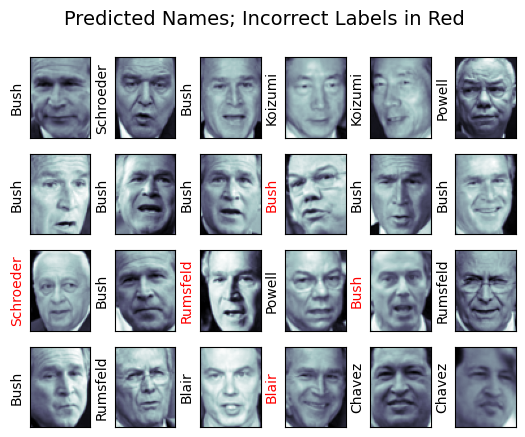

In [51]:
fig, ax = plt.subplots(4, 6) # COGE UNA MUESTRA O CANTIDAD DEL TOTAL DE FOTOGRAFIAS (EN ESTE CASO)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],         # ESTA FUNCIÓN IMPRIME CON 'ROJO' LAS ETIQUETAS QUE SE HAN ASIGNADO ERRONEAMENTE 
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14); 

In [52]:
from sklearn.metrics import classification_report  # DEVUELVE QUE TAN BUENO ES EL MODELO IDENTIFICANDO A CADA UNO DE LOS EX PREDIDENTES 'f1-score'  
                                                    # ES UN REPORTE DE CLASIFICACIÓN  
print(classification_report(ytest, yfit,
                            target_names=faces.target_names)) # 'weighted avg' MUESTRA LA PRECISIÓN DEL MODELO EN LA COLUMNA 'f1-score' 

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.73      0.71        15
     Colin Powell       0.83      0.85      0.84        68
  Donald Rumsfeld       0.78      0.68      0.72        31
    George W Bush       0.89      0.87      0.88       126
Gerhard Schroeder       0.69      0.87      0.77        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.88      0.85        42

         accuracy                           0.83       337
        macro avg       0.82      0.82      0.81       337
     weighted avg       0.84      0.83      0.83       337



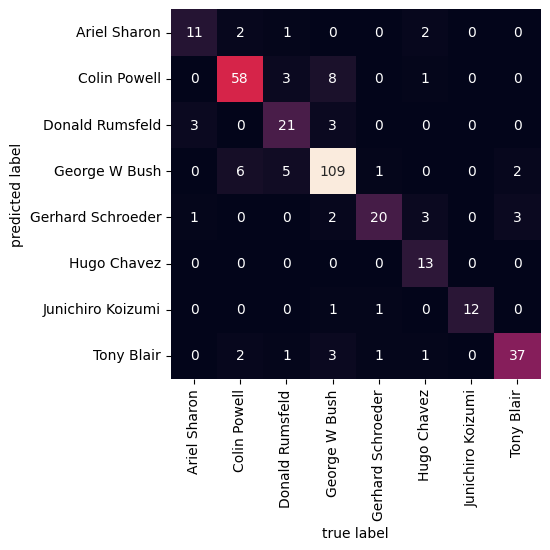

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label'); 

In [56]:
# EN LA MATRIZ DE CORRELACION SE OBSERVA SI LOS PERSONAJES HAN SIDO CONFUNDIDOS CON ALGUIEN, Y EN CASO DE SER ASÍ, CON QUIÉN HAN SIDO CONFUNDIDOS. ESTO SE
 # APRECIA OBSERVANDO LAS LINEAS HORIZONTALES DE LA MATRIZ POR CADA PERSONAJE. ENTRE MÁS CERCANO A 1 ES EL VALOR, MÁS PARECIDOS SON. 
  # (VER NOMBRE QUE TIENEN ESOS VALORES 'predicted label')  

Probad variando el tipo de kernel, valores del grid search... a ver hasta dónde llegamos.